# object recognition for autonomous vehicles
The goal of this project is to classify 15 different types of objects from the road. The types are following: <br/>
1. Cars
2. Trucks
3. Traffic signals: such as stop signs, traffic lights, and road signs
4. Road markings: such as lane lines, crosswalks, and pavement markings
5. Construction zones: such as cones, barriers, and construction vehicles
6. Animals: such as wild animals, domestic animals, and farm animals
7. Road obstacles: such as fallen trees, debris, and potholes
8. Pedestrians: people walking, jogging or cycling
9. Emergency vehicles: such as ambulances, fire trucks, and police cars
10. Bicycles: individual or group of people riding bicycles
11. Motorcycles: individual or group of people riding motorcycles
12. Buses
13. Road works: construction workers, heavy machinery, excavation
14. Drones: flying drones in the vicinity of the vehicle
15. Zebra crossing

# Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 1

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MasterCourse/CapstonProject02

/content/drive/MyDrive/MasterCourse/CapstonProject02


# Fetch Data

In [ ]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(256))                            # resizing to get the image of same shape

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"dataloaders/obj_dataloader_v{version}.pkl")

In [ ]:
dls = torch.load(f"dataloaders/obj_dataloader_v{version}.pkl")

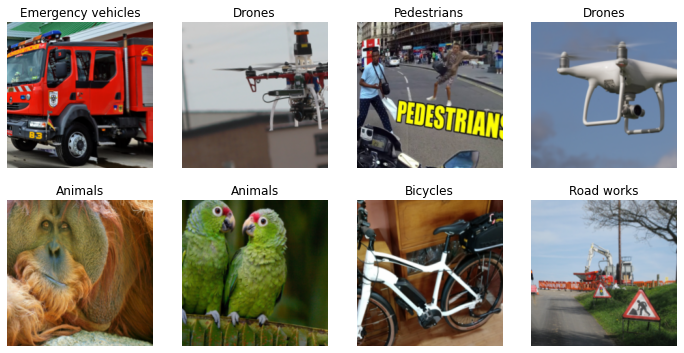

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

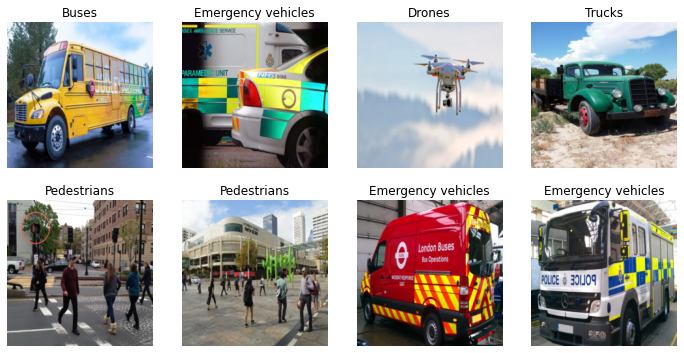

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Training and Data Cleaning

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.load(f"obj-recognizer-v{version}")

In [ ]:
model.fine_tune(10)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only 

In [ ]:
# model.fine_tune(1)

In [ ]:
model.save(f"obj-recognizer-v{version+1}")

Path('models/obj-recognizer-v2.pth')

In [ ]:
# model.load(f"cap-recognizer-v{version}")

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


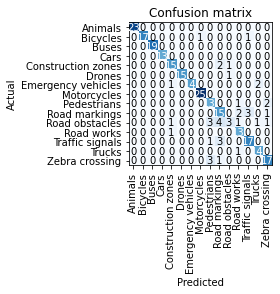

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

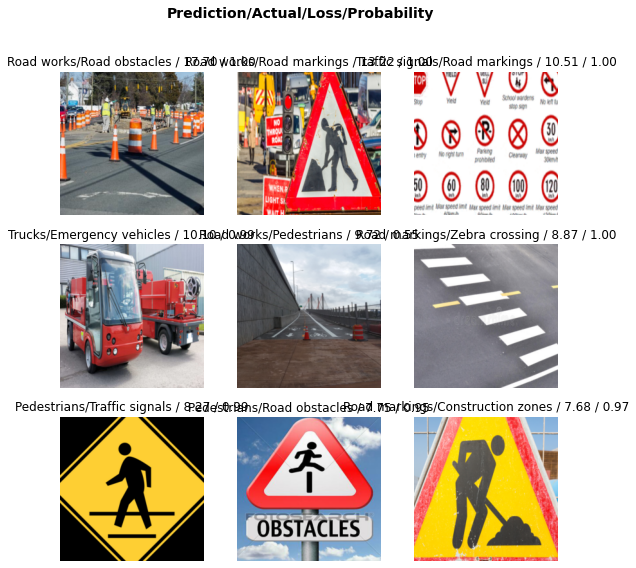

In [ ]:
interp.plot_top_losses(9, nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner # flat cap, bucket hat, taqiyah cap

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

# Export model for inference

In [ ]:
model.export(f"{model_path}/obj-recognizer-v{version+1}.pkl")

# **Inference**

**1**

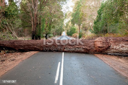

In [ ]:
img = Image.open(f'/content/test.jpg')
img.to_thumb(128,128)

In [ ]:
model = load_learner(f"{model_path}/obj-recognizer-v{version+1}.pkl")

In [ ]:
model.predict(f'/content/test.jpg')

('Road obstacles',
 TensorBase(10),
 TensorBase([6.2672e-06, 1.5048e-06, 8.2064e-08, 2.1504e-06, 5.5688e-05,
             7.4874e-07, 1.4092e-06, 7.2022e-08, 1.4064e-06, 1.0441e-06,
             9.9448e-01, 5.4139e-03, 5.2772e-07, 2.5959e-07, 3.3807e-05]))

**2**

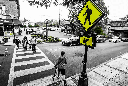

In [ ]:
img = Image.open(f'/content/Ped.png')
img.to_thumb(128,128)

In [ ]:
model = load_learner(f"{model_path}/obj-recognizer-v{version+1}.pkl")

In [ ]:
model.predict(f'/content/Ped.png')

('Pedestrians',
 TensorBase(8),
 TensorBase([1.2655e-08, 4.5253e-07, 6.0604e-08, 6.5656e-07, 8.9782e-06,
             3.7869e-07, 3.5370e-07, 4.9369e-07, 8.8883e-01, 4.4106e-05,
             1.3408e-07, 1.5464e-06, 9.0418e-05, 5.1966e-08, 1.1102e-01]))

**3**

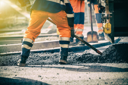

In [ ]:
img = Image.open(f'/content/RoadWorks.jpg')
img.to_thumb(128,128)

In [ ]:
model = load_learner(f"{model_path}/obj-recognizer-v{version+1}.pkl")

In [ ]:
model.predict(f'/content/RoadWorks.jpg')

('Construction zones',
 TensorBase(4),
 TensorBase([3.8049e-06, 2.6394e-05, 2.0145e-07, 5.8791e-06, 9.4964e-01,
             6.0750e-06, 5.7655e-07, 2.1704e-06, 4.7790e-02, 8.7506e-05,
             1.1040e-04, 1.4642e-03, 1.8482e-05, 1.4949e-07, 8.4582e-04]))

**4**

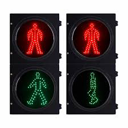

In [ ]:
img = Image.open(f'/content/TrafficSignals.jpg')
img.to_thumb(128,128)

In [ ]:
model = load_learner(f"{model_path}/obj-recognizer-v{version+1}.pkl")

In [ ]:
model.predict(f'/content/TrafficSignals.jpg')

('Traffic signals',
 TensorBase(12),
 TensorBase([8.3978e-10, 6.9900e-09, 5.0019e-11, 1.1429e-09, 6.0195e-12,
             6.4211e-13, 8.9902e-10, 1.3256e-08, 3.3233e-10, 7.1961e-11,
             1.1902e-13, 2.3991e-10, 1.0000e+00, 4.8853e-12, 1.9504e-06]))

**5**

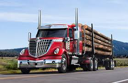

In [ ]:
img = Image.open(f'/content/trucks.jpg')
img.to_thumb(128,128)

In [ ]:
model = load_learner(f"{model_path}/obj-recognizer-v{version+1}.pkl")

In [ ]:
model.predict(f'/content/trucks.jpg')

('Trucks',
 TensorBase(13),
 TensorBase([1.2333e-06, 4.1417e-07, 1.9676e-06, 2.4237e-07, 1.9778e-07,
             1.4655e-07, 3.9507e-06, 1.1859e-06, 4.9937e-08, 1.5827e-08,
             6.5884e-08, 1.9166e-06, 6.8463e-07, 9.9999e-01, 1.6972e-08]))